In [131]:
from model.model import SpecVAE
from data_loader.data_loaders import EscDataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.nn import functional as F
from torch.optim import Adam
from os import path

import IPython
from librosa.feature.inverse import mel_to_audio
from librosa.feature.spectral import melspectrogram
from librosa import core
from dataset import transformers

import wave
import sys

In [134]:
spectro_x_path = "/Users/Dovermore/Documents/2021t1/VAE-audio/vae-audio-github/saved/samples/SpecVAE/0319_101858/1-62849-A-38.npy"
spectro_recon_path = path.splitext(spectro_x_path)[0] + "_recon" + path.splitext(spectro_x_path)[1]
audio_x_path = path.splitext(spectro_x_path)[0]+".wav"
audio_recon_path = path.splitext(spectro_recon_path)[0]+".wav"

x = np.load(spectro_x_path)
recon = np.load(spectro_recon_path)

(<matplotlib.image.AxesImage at 0x7fec402334d0>,
 <matplotlib.image.AxesImage at 0x7fec40205410>)

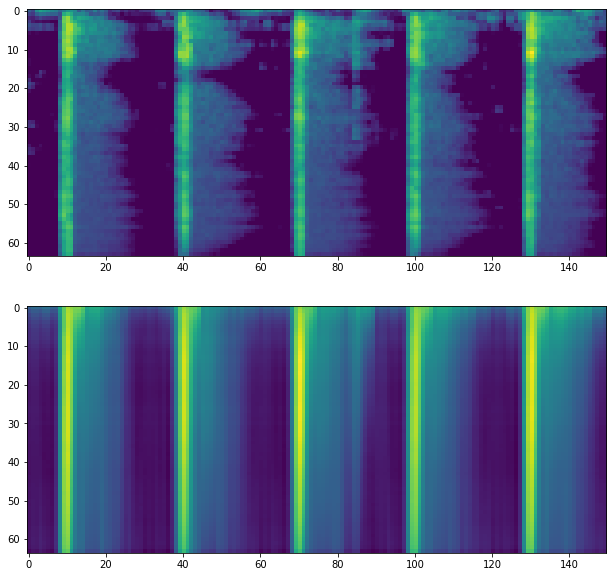

In [135]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[100, 10])
ax1.imshow(x), ax2.imshow(recon)

In [136]:
IPython.display.display(IPython.display.Audio(audio_x_path))
IPython.display.display(IPython.display.Audio(audio_recon_path))

In [132]:
spf = wave.open(audio_x_path, "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, "Int16")


# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(signal)
plt.show()

Error: unknown format: 3

# Audio test

## Debug

In [55]:
audio_file = "/Users/Dovermore/data/esc/audio10/1-4211-A-12.wav"
audio_original = core.load(audio_file)[0]
spectro_original = melspectrogram(audio_original)
audio_from_mel = mel_to_audio(spectro_original)
IPython.display.display(IPython.display.Audio(audio_original, rate=len(audio_original)//5))
IPython.display.display(IPython.display.Audio(audio_from_mel, rate=len(audio_from_mel)//5))

In [63]:
np_file = "/Users/Dovermore/data/esc/esc10-spectro1/data/1-4211-A-12.npy"
spectro = np.load(np_file)
spectro = core.db_to_power(spectro)
audio = mel_to_audio(spectro, sr=22050, n_fft=2048, hop_length=735)
IPython.display.Audio(audio, rate=len(audio)//5)

In [56]:
audio = mel_to_audio(spectro, sr=22050, n_fft=2048, hop_length=735)
audio

array([-0.00016773, -0.00051741, -0.00019769, ..., -0.00030121,
       -0.00043481, -0.00060371], dtype=float32)

In [57]:
np.mean(audio_original), np.std(audio_original)

(7.165678e-05, 0.075077936)

In [58]:
np.mean(audio), np.std(audio)

(4.0544205e-06, 0.004924861)